In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [2]:

df=pd.read_csv("mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [3]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [4]:
df.shape

(1836, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [6]:
## mode is used to fill categorical columns

In [7]:
df=pd.read_csv("mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [8]:
## filling each of the missing value in numeric clolumns
## categorical_data=df.select_dtypes(include=["int64","float64"])
## for x in categorical_data:
##    df[x].fillna(df[x].mean()[0],inplace=True)
##df.isnull().sum()

In [9]:
## removing punctuation marks
df["Price in INR"]= df["Price in INR"].str.replace(",","")
df["Price in INR"]= df["Price in INR"].str.replace("₹","")
df["Number of Ratings"]= df["Number of Ratings"].str.replace(",","")
df["Price in INR"]= pd.to_numeric(df["Price in INR"])
df["Number of Ratings"]= pd.to_numeric(df["Number of Ratings"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   int64  
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   int64  
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 157.9+ KB


In [10]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [11]:
## covert categorical to numerical
encoder=LabelEncoder()
category=df.select_dtypes(include=["object", "category"])
for x in category:
    df[x]= encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,5649,0
1,789,4.2,77128,25,20,118,32,78,173,11999,0
2,748,4.3,15175,25,20,172,26,78,106,6999,0
3,750,4.2,22621,25,20,137,26,78,193,7749,0
4,747,4.3,15175,25,20,172,26,78,106,6999,0


In [12]:
## splitting the dataset between x and y, x(independent) which are multiple variable and y(dependent) which is only 
## one variable(price).
x= df.drop(["Price in INR"], axis=1)
y=df["Price in INR"]

In [13]:
x.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,0
1,789,4.2,77128,25,20,118,32,78,173,0
2,748,4.3,15175,25,20,172,26,78,106,0
3,750,4.2,22621,25,20,137,26,78,193,0
4,747,4.3,15175,25,20,172,26,78,106,0


In [14]:
y.head()

0     5649
1    11999
2     6999
3     7749
4     6999
Name: Price in INR, dtype: int64

In [15]:
print(x.isnull().sum())

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Date of Scraping     0
dtype: int64


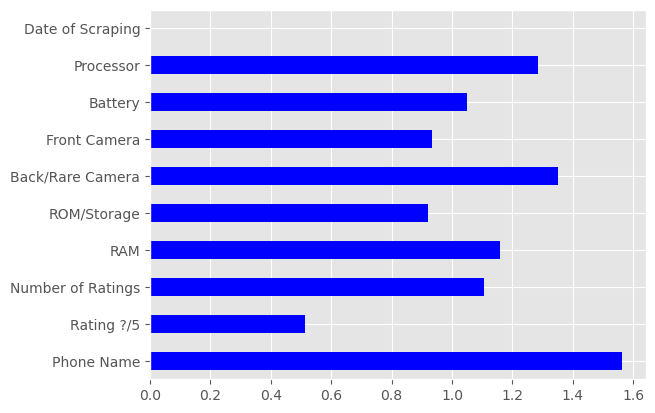

In [16]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use("ggplot")
importance= mutual_info_regression(x,y)
feature_impo=pd.Series(importance,x.columns[0:len(x.columns)])
feature_impo.plot(kind="barh", color="blue")
plt.show()

In [17]:
## splitting the dataset into training and testing set
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2,random_state=1)

In [18]:
# bringing in our machine learning algorithm
from sklearn.pipeline import Pipeline
LinearModel=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)                                                   

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [19]:
## testing the data set.
pred1=LinearModel.predict(xtest)
pred1

array([ 2.66153546e+04,  2.17674284e+04,  2.84404176e+04,  3.23683926e+03,
        3.77470056e+04,  4.52889219e+03,  2.18821367e+04,  3.80466608e+04,
        1.16724230e+04,  1.73364948e+04,  2.46745992e+04,  3.82745381e+04,
        1.19448405e+04,  3.03685902e+04,  2.49655910e+02,  3.56493998e+04,
        4.36846930e+04,  2.07334008e+04,  1.43632302e+04,  3.10973731e+04,
        2.35170028e+04,  1.98327282e+04,  7.31735641e+04,  1.93778255e+04,
       -2.06265194e+03,  2.98928667e+04,  7.11073237e+04,  2.57916810e+04,
        2.36069081e+04,  3.61211215e+04,  2.44448568e+04,  2.94146738e+04,
        1.25966156e+04,  6.86242925e+04,  9.80428857e+03, -1.23735473e+02,
        2.47905495e+04,  1.52459263e+04,  1.99965135e+04,  1.93644443e+04,
        6.94979863e+04,  2.16000539e+04,  1.07188759e+04,  1.19381500e+04,
        2.14036280e+04,  2.32161950e+04,  2.25132541e+04,  1.63282539e+04,
        1.78263599e+04,  1.63131068e+04,  2.89806553e+04,  1.98971502e+04,
        1.86813529e+04,  

In [20]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred1))
print("MAPE",mean_absolute_percentage_error (ytest,pred1))
print("MsE",mean_squared_error (ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 12801.740381276944
MAPE 1.357622460520504
MsE 307656692.6483434
R2 SCORE 0.3804020383235107


In [21]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred1
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
556,20999,26615.354606
1386,1250,21767.428439
1450,16499,28440.417552
111,14999,3236.839258
1787,15999,37747.005596
...,...,...
790,13999,25551.551649
846,10990,25111.503170
654,13499,23120.231780
1084,36600,20240.346964


In [22]:
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [23]:
## testing the data set.
pred2=tree.predict(xtest)
pred2

array([ 20999.        ,   1617.5       ,  16499.        ,  14999.        ,
        15999.        ,   6999.        ,  10499.        ,  11999.        ,
         8999.        ,  27990.        ,  36990.        ,  27990.        ,
        15499.        ,   9999.        ,  24990.        ,  16999.        ,
        14999.        ,  36999.        ,  25999.        ,  32299.        ,
        25999.        ,   7199.        ,  69999.        ,  13999.        ,
         1949.        ,  10499.        ,  80999.        ,  31990.        ,
        48990.        ,  27999.        ,   9499.        ,   3440.        ,
        42999.        , 100999.        ,   5999.        ,  12999.        ,
        20999.        ,  27990.        ,  19990.        ,  13999.        ,
        71999.        ,  13499.        ,   8799.        ,  15499.        ,
        10499.        ,  38849.        ,  13999.        ,   1899.        ,
        14990.        ,  22800.        ,  13999.        ,  13999.        ,
        32990.        ,  

In [24]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred2))
print("MAPE",mean_absolute_percentage_error (ytest,pred2))
print("MsE",mean_squared_error (ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 2393.600996376812
MAPE 0.3294224684196338
MsE 80288104.9013436
R2 SCORE 0.8383056590918971


In [25]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred2
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
556,20999,20999.0
1386,1250,1617.5
1450,16499,16499.0
111,14999,14999.0
1787,15999,15999.0
...,...,...
790,13999,13999.0
846,10990,10990.0
654,13499,13499.0
1084,36600,46990.0


In [26]:
Forest=RandomForestRegressor()
Forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [27]:
## testing the data set.
pred3=Forest.predict(xtest)
pred3

array([ 22017.79      ,   2483.42416667,  17058.82      ,  15580.49      ,
        16023.82      ,   7204.82      ,  10248.15      ,  12111.33      ,
         8820.84      ,  28985.85      ,  53266.69      ,  29354.48      ,
        15013.51      ,  14956.85      ,  28536.53      ,  16733.45      ,
        14922.77      ,  44312.04      ,  26783.26      ,  33217.83      ,
        27278.84      ,   7098.53      ,  70729.        ,  13804.04      ,
         1860.18654762,  10973.64      ,  81799.        ,  38332.48      ,
        45830.52      ,  27204.22      ,   9426.32      ,   7925.48166667,
        33886.56      , 100669.        ,   6542.41      ,  12834.48666667,
        18447.81      ,  29078.3125    ,  20963.82      ,  13634.01      ,
        72929.        ,  13805.83      ,   9817.68      ,  15013.51      ,
        10546.54      ,  29113.        ,  12432.15      ,   2543.5025    ,
        15368.8       ,  23363.27      ,  14275.92      ,  14246.71      ,
        30105.6875    ,  

In [28]:
## checking how our model perform usin any of these from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("MAE",mean_absolute_error(ytest, pred3))
print("MAPE",mean_absolute_percentage_error (ytest,pred3))
print("MsE",mean_squared_error (ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 2460.173666601967
MAPE 0.2718904668335519
MsE 35739255.61901277
R2 SCORE 0.9280237665471941


In [29]:
## to check how poor the prediction above is.

OUTCOME = {
    "Actual price":ytest,
    "Predicted price":pred3
}
df3=pd.DataFrame(OUTCOME)
df3

,Actual price,Predicted price
556,20999,22017.790000
1386,1250,2483.424167
1450,16499,17058.820000
111,14999,15580.490000
1787,15999,16023.820000
...,...,...
790,13999,12769.560000
846,10990,11003.490000
654,13499,13463.500000
1084,36600,47101.670000


<Axes: xlabel='Price in INR'>

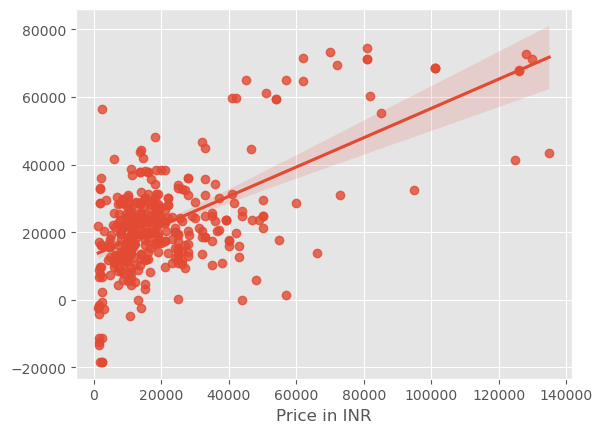

In [34]:
## SHOWING HOW THE REGRESSION WORK
sns.regplot(x=ytest, y=pred1)

<Axes: xlabel='Price in INR'>

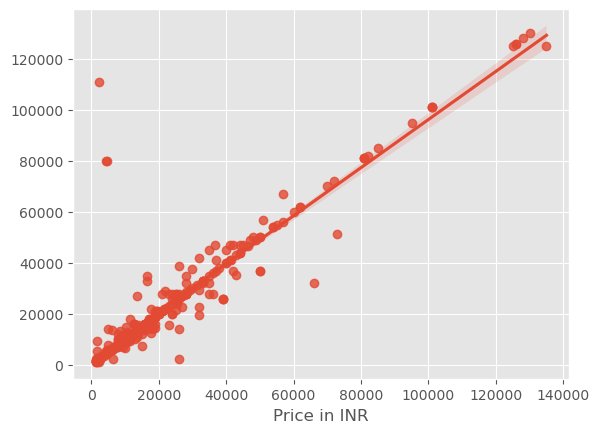

In [31]:
sns.regplot(x=ytest, y=pred2)

<Axes: xlabel='Price in INR'>

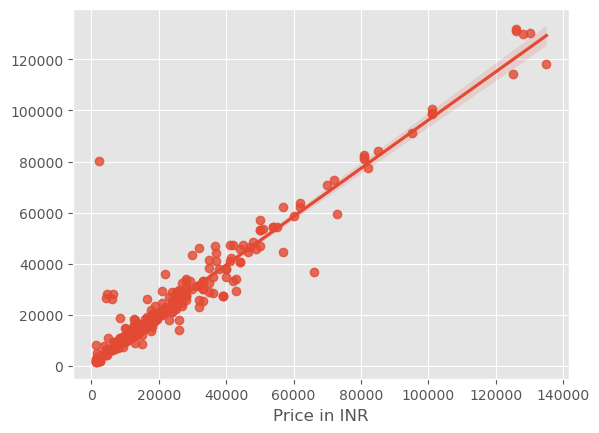

In [32]:
sns.regplot(x=ytest, y=pred3)